<a href="https://colab.research.google.com/github/sharonapa/naya-ds-course/blob/main/NAYA_DS_23_regression_project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Salary prediction project**

By: Sharon Napadenski , Yuval Levi

Date: 09/2023

# imports

In [3]:
import sklearn as sk
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import seaborn as sns
#k-nearest, regression-trees, linear regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Read data

In [5]:
# from raz shared folder
X_TRAIN_PATH = '/content/gdrive/MyDrive/Colab Notebooks/data/X_train.csv'
Y_TRAIN_PATH = '/content/gdrive/MyDrive/Colab Notebooks/data/y_train.csv'


X_TEST_PATH = '/content/gdrive/MyDrive/Colab Notebooks/data/Copy of X_test.csv'
Y_TEST_PATH = '/content/gdrive/MyDrive/Colab Notebooks/data/Copy of y_test.csv'

## read TRAIN

In [6]:
df_x_train_skills = pd.read_csv(X_TRAIN_PATH)
df_x_train_skills = df_x_train_skills[['Age', 'Gender', 'Education Level','Job Title', 'Years of Experience', 'Country', 'Race', 'height','weight', 'id', 'professionalism']]
df_x_train_skills.set_index('id',drop=True,inplace=True)
df_x_train_skills.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race,height,weight,professionalism
id,,,,,,,,,,
2477,52.0,M,bachelor's|degr,back|end|develope,24.0,australi,Asian,1.800316,95.021957,1150.0
76,52.0,F,bachelor,operations|manage,23.0,us,White,2.451414,87.456039,1100.0
64,27.0,M,bachelor,junior|accountan,2.0,australi,Australian,1.917509,56.997108,26.0
924,32.0,M,bachelor,data|analys,11.0,u,Welsh,2.160562,61.403169,279.0
242,39.0,F,bachelor,senior|product|manage,11.0,chin,Korean,1.794105,72.049210,380.0


we can see some null values

In [8]:
df_x_train_skills.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5363 entries, 2477 to 3572
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5359 non-null   float64
 1   Gender               5359 non-null   object 
 2   Education Level      5360 non-null   object 
 3   Job Title            5361 non-null   object 
 4   Years of Experience  5360 non-null   float64
 5   Country              5363 non-null   object 
 6   Race                 5363 non-null   object 
 7   height               5363 non-null   float64
 8   weight               5361 non-null   float64
 9   professionalism      5360 non-null   float64
dtypes: float64(5), object(5)
memory usage: 589.9+ KB


read train y (target)

In [9]:
df_y_train_skills = pd.read_csv(Y_TRAIN_PATH,index_col=[0])
df_y_train_skills.head()

,Salary
2477,175966.0
76,160000.0
64,35000.0
924,195000.0
242,120000.0


Check for nan (found some...)

In [10]:
df_y_train_skills.info()
print('*' * 50)
print(f'number of null in y train: {df_y_train_skills.Salary.isna().sum()}')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5363 entries, 2477 to 3572
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Salary  5358 non-null   float64
dtypes: float64(1)
memory usage: 83.8 KB
**************************************************
number of null in y train: 5


we can see most salaries are in the range of : 50K to 200K

array([[<Axes: title={'center': 'Salary'}>]], dtype=object)

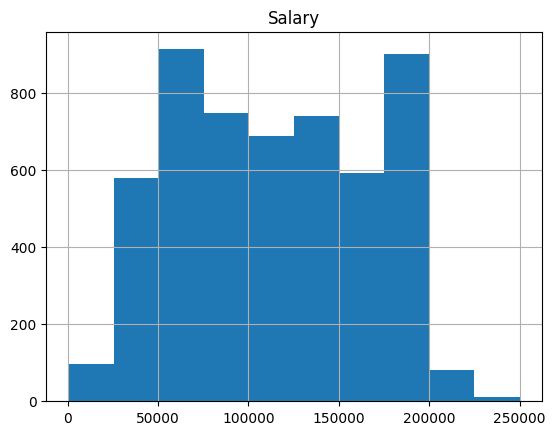

In [11]:
df_y_train_skills.hist()

## read TEST

In [12]:
df_x_test_skills = pd.read_csv(X_TEST_PATH)
df_x_test_skills = df_x_test_skills[['Age', 'Gender', 'Education Level','Job Title', 'Years of Experience', 'Country', 'Race', 'height','weight', 'id', 'professionalism']]
df_x_test_skills.set_index('id',drop=True,inplace=True)
df_x_test_skills.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1341 entries, 6480 to 2506
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1341 non-null   float64
 1   Gender               1341 non-null   object 
 2   Education Level      1341 non-null   object 
 3   Job Title            1341 non-null   object 
 4   Years of Experience  1341 non-null   float64
 5   Country              1341 non-null   object 
 6   Race                 1341 non-null   object 
 7   height               1341 non-null   float64
 8   weight               1341 non-null   float64
 9   professionalism      1341 non-null   float64
dtypes: float64(5), object(5)
memory usage: 115.2+ KB


# EDA

## corelation matrix
1. we can see 'height' is not correlated with salary, all others are correlated

In [14]:
def create_correlation_matrix(df):
    correlation_matrix = df.corr()

    color = plt.get_cmap('RdYlGn')   # default color
    color.set_bad('lightblue')    # if the value is bad the color would be lightblue instead of white

    sns.heatmap(correlation_matrix, annot=True, cmap=color, center=0)
    plt.title('Correlation Matrix Heatmap')

<ipython-input-14-5a1b7231679b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


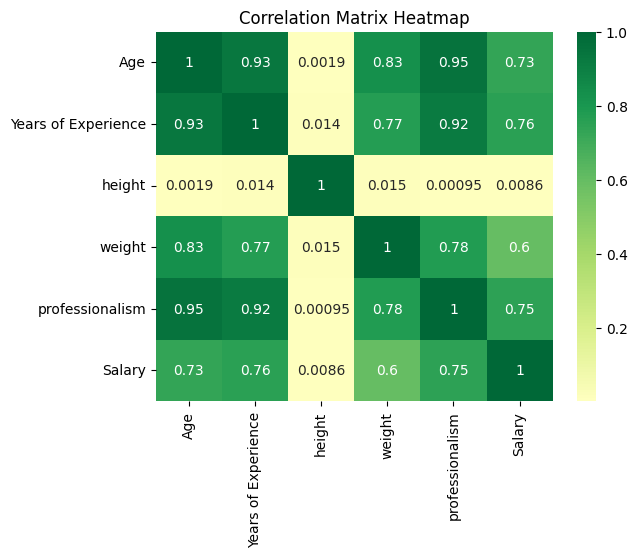

In [15]:
df = pd.concat([df_x_train_skills, df_y_train_skills], axis=1)
create_correlation_matrix(df)

Dropping the height column

In [16]:
df_x_train_skills.drop('height', axis=1, inplace=True,errors='ignore')

# PREPROCESS
- remove train Nan
- impute
- encode
- scale

## helper impute functions

### IMPUTE

In [17]:
def impute_missing_values(df_train, df_test , remove_row_missing_cat_data):
    '''
    run on all cols, impute string by MODE or number by mean
    fit_transform on train, transform on test
    '''
    imputer_dict = {}

    for col in df_train.columns:
        if df_train[col].dtype == 'object': # a string
            imp = SimpleImputer(strategy='most_frequent')
        else: # a number col
            imp = SimpleImputer(strategy='mean')

        df_train[col] = imp.fit_transform(df_train[col].values.reshape(-1, 1))
        df_test[col] = imp.transform(df_test[col].values.reshape(-1, 1))
        imputer_dict[col] = imp
    return df_train , df_test,imputer_dict

### One hot encode
encode on train , use on test, ignore unknown category (in test set)

In [18]:
def one_hot_encode(df_train, df_test):

  cat_col = list(df_train.select_dtypes(include=['object']).columns) # get cat cols
  encoder = OneHotEncoder(handle_unknown='ignore')

  encoded_data = encoder.fit_transform(df_train[cat_col])
  encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(cat_col),index=df_train.index)
  df_train_no_cat_col = df_train.drop(cat_col,axis = 1, inplace=False) #drop the original cat col
  final_df_train = pd.concat([df_train_no_cat_col, encoded_df], axis=1).reindex(df_train.index)

  encoded_test_data = encoder.transform(df_test[cat_col])
  encoded_test_df = pd.DataFrame(encoded_test_data.toarray(), columns=encoder.get_feature_names_out(cat_col),index=df_test.index)
  df_test_no_cat_col = df_test.drop(cat_col,axis = 1, inplace=False) #drop the original cat col
  final_df_test = pd.concat([df_test_no_cat_col, encoded_test_df], axis=1).reindex(df_test.index)

  return final_df_train ,final_df_test

### Scale

scale each feature between 0,1. could make the fit procees faster

In [19]:
def scale_data(df_train, df_test):
    df_train = df_train.copy()
    df_test = df_test.copy()
    numeric_cols = list(df_train.select_dtypes(include=[np.number]).columns.values)

    scaler = MinMaxScaler()
    df_train[numeric_cols] = scaler.fit_transform(df_train[numeric_cols])

    df_test[numeric_cols] = scaler.transform(df_test[numeric_cols])
    return df_train,df_test

## run preprocess

In [20]:
#remove nan values  from train
na_filter = df_y_train_skills['Salary'].notna()
df_y_train_skills = df_y_train_skills[na_filter]
df_x_train_skills = df_x_train_skills[na_filter]


#IMPUTE
df_x_train_skills_copy = df_x_train_skills.copy()
df_x_test_skills_copy = df_x_test_skills.copy()
df_x_train_skills_copy,df_x_test_skills_copy, imputer_dict = impute_missing_values(df_x_train_skills_copy,df_x_test_skills_copy,False)

## Feature eng
we are going to create an 'education_factor'  = degree * years of exp

In [22]:
degrees = df_x_train_skills_copy['Education Level'].unique()
degrees

array(["bachelor's|degr", 'bachelor', "master's|degr", 'p', 'master',
       'high|scho'], dtype=object)

In [23]:
degree_factor = {}
for degree in degrees:
    if 'high' in degree:
        degree_factor[degree] = 1
    if 'bachelor' in degree:
        degree_factor[degree] = 1.5
    if 'master' in degree:
        degree_factor[degree] = 2
    if degree =='p':
        degree_factor[degree] = 2.5
degree_factor

{"bachelor's|degr": 1.5,
 'bachelor': 1.5,
 "master's|degr": 2,
 'p': 2.5,
 'master': 2,
 'high|scho': 1}

map and multiple

In [24]:
df_x_train_skills_copy['education_factor'] = df_x_train_skills_copy['Education Level'].map(degree_factor)
df_x_train_skills_copy['education_factor']  = df_x_train_skills_copy['education_factor'] *df_x_train_skills_copy['Years of Experience']

df_x_test_skills_copy['education_factor'] = df_x_test_skills_copy['Education Level'].map(degree_factor)
df_x_test_skills_copy['education_factor']  = df_x_test_skills_copy['education_factor'] *df_x_test_skills_copy['Years of Experience']

the new feature 'education_factor' correlation is good : 0.77

<ipython-input-14-5a1b7231679b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


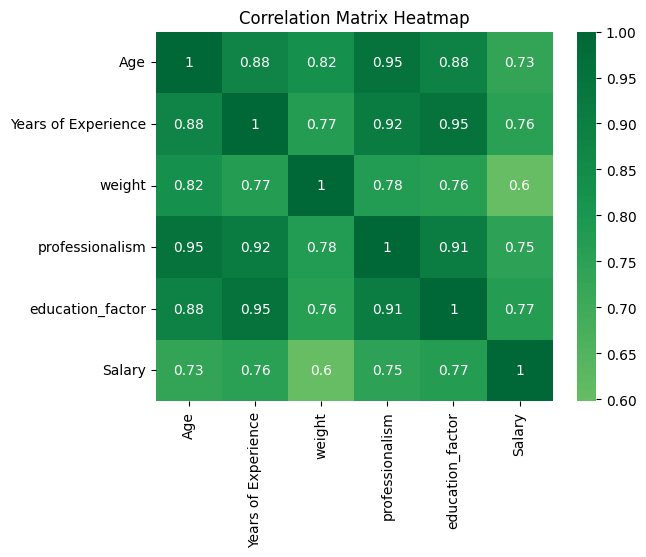

In [25]:
df = pd.concat([df_x_train_skills_copy, df_y_train_skills], axis=1)
create_correlation_matrix(df)

In [26]:
df_x_test_skills_copy.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Country                0
Race                   0
height                 0
weight                 0
professionalism        0
education_factor       0
dtype: int64

## scale and encode

In [27]:
#scale
df_x_train_skills_copy_scale,df_x_test_skills_copy_scale = scale_data(df_x_train_skills_copy, df_x_test_skills_copy)

#ENCODE
df_x_train_skills_copy_encode,df_x_test_skills_copy_encode = one_hot_encode(df_x_train_skills_copy_scale,df_x_test_skills_copy_scale)

# TRAIN

In [28]:
def knn_train(df_x_train, series_y_train,v_n_neighbors):
  knn = KNeighborsClassifier(n_neighbors=v_n_neighbors)
  knn.fit(df_x_train, series_y_train)
  return knn

In [29]:
def decision_tree_train(df_x_train,series_y_train,c,s):
  decision_tree = DecisionTreeRegressor(random_state=0,criterion=c,min_samples_split=s)
  decision_tree.fit(df_x_train,series_y_train)
  return decision_tree

In [30]:
def lin_reg_train(df_x_train,series_y_train,f):
  lin_reg_model = LinearRegression(fit_intercept=f)
  lin_reg_model.fit(df_x_train,series_y_train)
  return lin_reg_model

# run train and validate
- took 10% from train for validation of the models
- did my own simple grid search

In [31]:
train_x, val_x,train_y, val_y = train_test_split(df_x_train_skills_copy_encode,df_y_train_skills, test_size=0.1)

save results here

In [32]:
results_dict = {"model":[],
                "model_name":[],
                "model_config":[],
                "rmse_train":[],
                "rmse_val":[]}

## knn search space on K

In [33]:
knn_values = range(3,11,2)
rmse_train_arr = []
rmse_val_arr = []
for knn_val in knn_values:
  knn_model = knn_train(train_x, train_y['Salary'],v_n_neighbors=knn_val)
  knn_model_name = f'knn_{knn_val}'

  y_train_pred = knn_model.predict(train_x)
  y_train_true = train_y['Salary']
  rmse_train = mean_squared_error(y_train_true, y_train_pred, squared=False)
  rmse_train_arr.append(rmse_train)

  y_pred = knn_model.predict(val_x)
  y_true = val_y['Salary']
  rmse_val = mean_squared_error(y_true, y_pred, squared=False)
  rmse_val_arr.append(rmse_val)

  #save results
  results_dict['model'].append(knn_model)
  results_dict['model_name'].append('KNN')
  results_dict['model_config'].append(knn_model_name)

results_dict['rmse_train']+=rmse_train_arr
results_dict['rmse_val']+=rmse_val_arr
#results_dict['rmse_test']+=list(np.zeros_like(rmse_val_arr,dtype=np.int32))
results_dict

{'model': [KNeighborsClassifier(n_neighbors=3),
  KNeighborsClassifier(),
  KNeighborsClassifier(n_neighbors=7),
  KNeighborsClassifier(n_neighbors=9)],
 'model_name': ['KNN', 'KNN', 'KNN', 'KNN'],
 'model_config': ['knn_3', 'knn_5', 'knn_7', 'knn_9'],
 'rmse_train': [22554.971810757666,
  26274.022499480237,
  27148.796221509776,
  26607.45844739132],
 'rmse_val': [31210.233239168265,
  30636.372808173914,
  29441.575702294795,
  28075.917700508853]}

## DecisionTreeRegressor

In [34]:
criterions = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
min_samples_splitint = range(2,10,2)
rmse_train_arr = []
rmse_val_arr = []

for c in criterions:
    for s in min_samples_splitint:
        tree_model = decision_tree_train(train_x, train_y['Salary'],c, s)
        tree_model_name = f'dt_{c}_{s}'

        y_train_pred = knn_model.predict(train_x)
        y_train_true = train_y['Salary']
        rmse_train = mean_squared_error(y_train_true, y_train_pred, squared=False)
        rmse_train_arr.append(rmse_train)

        y_pred = tree_model.predict(val_x)
        y_true = val_y['Salary']
        rmse_val = mean_squared_error(y_true, y_pred, squared=False)
        rmse_val_arr.append(rmse_val)

        #save results
        results_dict['model'].append(tree_model)
        results_dict['model_name'].append('DecisionTree')
        results_dict['model_config'].append(tree_model_name)
        #results_dict['rmse_val'].append(rmse_val)

results_dict['rmse_train']+=rmse_train_arr
results_dict['rmse_val']+=rmse_val_arr
#results_dict['rmse_test']+=list(np.zeros_like(rmse_val_arr,dtype=np.int32))


## Linear reg

In [35]:
rmse_train_arr = []
rmse_val_arr = []
fit_intercept = [True,False]
#normalize = [True,False]

for f in fit_intercept:
    linreg_model = lin_reg_train(train_x, train_y['Salary'],f)
    linreg_model_name = f'linreg_{c}_{s}'

    y_train_pred = knn_model.predict(train_x)
    y_train_true = train_y['Salary']
    rmse_train = mean_squared_error(y_train_true, y_train_pred, squared=False)
    rmse_train_arr.append(rmse_train)

    y_pred = tree_model.predict(val_x)
    y_true = val_y['Salary']
    rmse_val = mean_squared_error(y_true, y_pred, squared=False)
    rmse_val_arr.append(rmse_val)

    #save results
    results_dict['model'].append(linreg_model)
    results_dict['model_name'].append('LinReg')
    results_dict['model_config'].append(linreg_model_name)
    #results_dict['rmse_val'].append(rmse_val)

results_dict['rmse_train']+=rmse_train_arr
results_dict['rmse_val']+=rmse_val_arr
#results_dict['rmse_test']+=list(np.zeros_like(rmse_val_arr,dtype=np.int32))


Dataframe of results

In [36]:
df_results = pd.DataFrame(results_dict)

In [37]:
df_results[df_results['model_name']=='LinReg']

,model,model_name,model_config,rmse_train,rmse_val
20,LinearRegression(),LinReg,linreg_poisson_8,26607.458447,11685.283267
21,LinearRegression(fit_intercept=False),LinReg,linreg_poisson_8,26607.458447,11685.283267


##  ensemble
- take the best of each model type
- create 3 new cols: KNN_PREDICT , LINREG_PREDICT, DT_PREDICT
- create ensemble col = mean of the 3 models values
- calc RMSE on the ensemble col
- NOW we got another type of model

get best model of each type

In [38]:
df_best_model_results = df_results.groupby('model_name').min('rmse_val').reset_index()
df_best_model_results

,model_name,rmse_train,rmse_val
0,DecisionTree,26607.458447,8989.252769
1,KNN,22554.971811,28075.917701
2,LinReg,26607.458447,11685.283267


In [39]:
best_model_arr = []
for index, row in df_best_model_results.iterrows():
    model_name = row['model_name']
    rmse_val = row['rmse_val']
    #print(rmse_val , rmse_train, model_name)
    best_model = df_results.loc[((df_results['rmse_val'] == rmse_val) &
                                 (df_results['model_name'] == model_name)), 'model'].iloc[0]

    #print(best_model)
    best_model_arr.append(best_model)

df_best_model_results['best_model'] = best_model_arr
df_best_model_results

,model_name,rmse_train,rmse_val,best_model
0,DecisionTree,26607.458447,8989.252769,DecisionTreeRegressor(criterion='absolute_erro...
1,KNN,22554.971811,28075.917701,KNeighborsClassifier(n_neighbors=9)
2,LinReg,26607.458447,11685.283267,LinearRegression()


do predict with each best model , do mean on each perdict row

In [40]:

def ensemble_predict(df_x):
    best_model_columns = []
    df_x_ensemble = df_x.copy()
    for index, row in df_best_model_results.iterrows():
        model_name = row['model_name']
        model = row['best_model']
        y_pred = model.predict(df_x)
        df_x_ensemble[f'{model_name}_predict'] = y_pred
        best_model_columns.append(f'{model_name}_predict')

    df_x_ensemble['mean_best_model_predict'] = df_x_ensemble[best_model_columns].mean(axis=1)
    y_ensemble_pred = df_x_ensemble['mean_best_model_predict']
    return y_ensemble_pred ,df_x_ensemble,best_model_columns

val set enseble

In [41]:
y_val_pred ,df_val_x_ensemble,best_model_columns = ensemble_predict(val_x)
y_val_true = val_y['Salary']

RMSE of ensemble of 3 is HUGE !!!
let's check

In [42]:
rmse_ensemble = mean_squared_error(y_val_true, y_val_pred, squared=False)
print(f'RMSE of val ensemble is: {rmse_ensemble}')

RMSE of val ensemble is: 21091536165657.11


train set ensemble

In [43]:
y_train_pred ,df_train_x_ensemble ,best_model_columns= ensemble_predict(train_x)
y_train_true = train_y['Salary']

In [44]:
rmse_train_ensemble = mean_squared_error(y_train_true, y_train_pred, squared=False)
print(f'RMSE of train ensemble is: {rmse_train_ensemble}')

RMSE of train ensemble is: 11998.736254477313


add this results

In [45]:
new_row = {'model': 'ENSEMBLE', 'model_name': 'ENSEMBLE', 'model_config': 'ENSEMBLE_3','rmse_train':rmse_train_ensemble, 'rmse_val':rmse_ensemble}

# Add the new row to the DataFrame
df_results = df_results.append(new_row, ignore_index=True)
df_results

<ipython-input-45-217caca8bc85>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(new_row, ignore_index=True)


,model,model_name,model_config,rmse_train,rmse_val
0,KNeighborsClassifier(n_neighbors=3),KNN,knn_3,22554.971811,3.121023e+04
1,KNeighborsClassifier(),KNN,knn_5,26274.022499,3.063637e+04
2,KNeighborsClassifier(n_neighbors=7),KNN,knn_7,27148.796222,2.944158e+04
3,KNeighborsClassifier(n_neighbors=9),KNN,knn_9,26607.458447,2.807592e+04
4,DecisionTreeRegressor(random_state=0),DecisionTree,dt_squared_error_2,26607.458447,1.157795e+04
5,"DecisionTreeRegressor(min_samples_split=4, ran...",DecisionTree,dt_squared_error_4,26607.458447,1.114640e+04
6,"DecisionTreeRegressor(min_samples_split=6, ran...",DecisionTree,dt_squared_error_6,26607.458447,1.124044e+04
7,"DecisionTreeRegressor(min_samples_split=8, ran...",DecisionTree,dt_squared_error_8,26607.458447,1.092387e+04
8,DecisionTreeRegressor(criterion='friedman_mse'...,DecisionTree,dt_friedman_mse_2,26607.458447,1.157795e+04
9,DecisionTreeRegressor(criterion='friedman_mse'...,DecisionTree,dt_friedman_mse_4,26607.458447,1.114640e+04


Lin reg model has a big mistake!

In [46]:
df_val_x_ensemble.max()

Age                        1.000000e+00
Years of Experience        1.000000e+00
weight                     1.000000e+00
professionalism            8.470588e-01
education_factor           1.000000e+00
                               ...     
Race_White                 1.000000e+00
DecisionTree_predict       2.250000e+05
KNN_predict                2.150000e+05
LinReg_predict             1.025161e+15
mean_best_model_predict    3.417202e+14
Length: 209, dtype: float64

we can see the predictions of the models and the outliers

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log10
  result = func(self.values, **kwargs)


<Axes: >

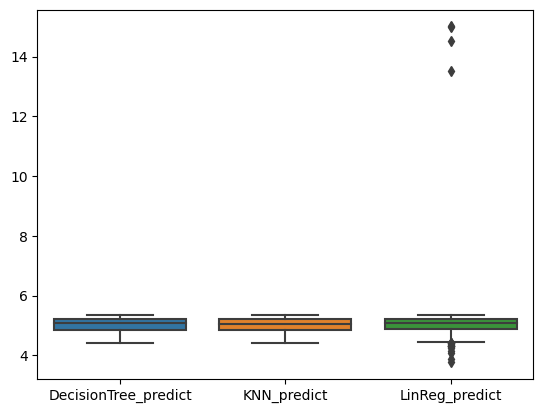

In [47]:
sns.boxplot(data=np.log10(df_val_x_ensemble[best_model_columns]))

Let's do ensemble of KNN and DECISION TREE

val ensemble

In [48]:
df_val_x_ensemble['mean_best_2model_predict'] = df_val_x_ensemble[['DecisionTree_predict','KNN_predict']].mean(axis=1)

y_val_pred = df_val_x_ensemble['mean_best_2model_predict']
y_val_true = val_y['Salary']

In [49]:
rmse_val_2ensemble = mean_squared_error(y_val_true, y_val_pred, squared=False)
print(f'RMSE of val ensemble is: {rmse_val_2ensemble}')

RMSE of val ensemble is: 15305.751947622051


train ensemble

In [50]:
df_train_x_ensemble['mean_best_2model_predict'] = df_train_x_ensemble[['DecisionTree_predict','KNN_predict']].mean(axis=1)

y_train_pred = df_train_x_ensemble['mean_best_2model_predict']
y_train_true = train_y['Salary']

In [51]:
rmse_train_2ensemble = mean_squared_error(y_train_true, y_train_pred, squared=False)
print(f'RMSE of train ensemble is: {rmse_train_2ensemble}')

RMSE of train ensemble is: 13788.25366695737


Add the new model to the results table

In [52]:
new_row = {'model': 'ENSEMBLE', 'model_name': 'ENSEMBLE', 'model_config': 'ENSEMBLE_2','rmse_train':rmse_train_2ensemble, 'rmse_val':rmse_val_2ensemble}

# Add the new row to the DataFrame
df_results = df_results.append(new_row, ignore_index=True)
df_results

<ipython-input-52-73dde7cccb2b>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(new_row, ignore_index=True)


,model,model_name,model_config,rmse_train,rmse_val
0,KNeighborsClassifier(n_neighbors=3),KNN,knn_3,22554.971811,3.121023e+04
1,KNeighborsClassifier(),KNN,knn_5,26274.022499,3.063637e+04
2,KNeighborsClassifier(n_neighbors=7),KNN,knn_7,27148.796222,2.944158e+04
3,KNeighborsClassifier(n_neighbors=9),KNN,knn_9,26607.458447,2.807592e+04
4,DecisionTreeRegressor(random_state=0),DecisionTree,dt_squared_error_2,26607.458447,1.157795e+04
5,"DecisionTreeRegressor(min_samples_split=4, ran...",DecisionTree,dt_squared_error_4,26607.458447,1.114640e+04
6,"DecisionTreeRegressor(min_samples_split=6, ran...",DecisionTree,dt_squared_error_6,26607.458447,1.124044e+04
7,"DecisionTreeRegressor(min_samples_split=8, ran...",DecisionTree,dt_squared_error_8,26607.458447,1.092387e+04
8,DecisionTreeRegressor(criterion='friedman_mse'...,DecisionTree,dt_friedman_mse_2,26607.458447,1.157795e+04
9,DecisionTreeRegressor(criterion='friedman_mse'...,DecisionTree,dt_friedman_mse_4,26607.458447,1.114640e+04


## validation results
in order to check our models on 10% of the data

In [53]:
df_results.sort_values(by='rmse_val', ascending=True)

,model,model_name,model_config,rmse_train,rmse_val
15,DecisionTreeRegressor(criterion='absolute_erro...,DecisionTree,dt_absolute_error_8,26607.458447,8.989253e+03
14,DecisionTreeRegressor(criterion='absolute_erro...,DecisionTree,dt_absolute_error_6,26607.458447,8.993350e+03
13,DecisionTreeRegressor(criterion='absolute_erro...,DecisionTree,dt_absolute_error_4,26607.458447,9.022294e+03
12,DecisionTreeRegressor(criterion='absolute_erro...,DecisionTree,dt_absolute_error_2,26607.458447,9.487911e+03
11,DecisionTreeRegressor(criterion='friedman_mse'...,DecisionTree,dt_friedman_mse_8,26607.458447,1.092387e+04
7,"DecisionTreeRegressor(min_samples_split=8, ran...",DecisionTree,dt_squared_error_8,26607.458447,1.092387e+04
5,"DecisionTreeRegressor(min_samples_split=4, ran...",DecisionTree,dt_squared_error_4,26607.458447,1.114640e+04
9,DecisionTreeRegressor(criterion='friedman_mse'...,DecisionTree,dt_friedman_mse_4,26607.458447,1.114640e+04
6,"DecisionTreeRegressor(min_samples_split=6, ran...",DecisionTree,dt_squared_error_6,26607.458447,1.124044e+04
10,DecisionTreeRegressor(criterion='friedman_mse'...,DecisionTree,dt_friedman_mse_6,26607.458447,1.124044e+04


plot each type of model

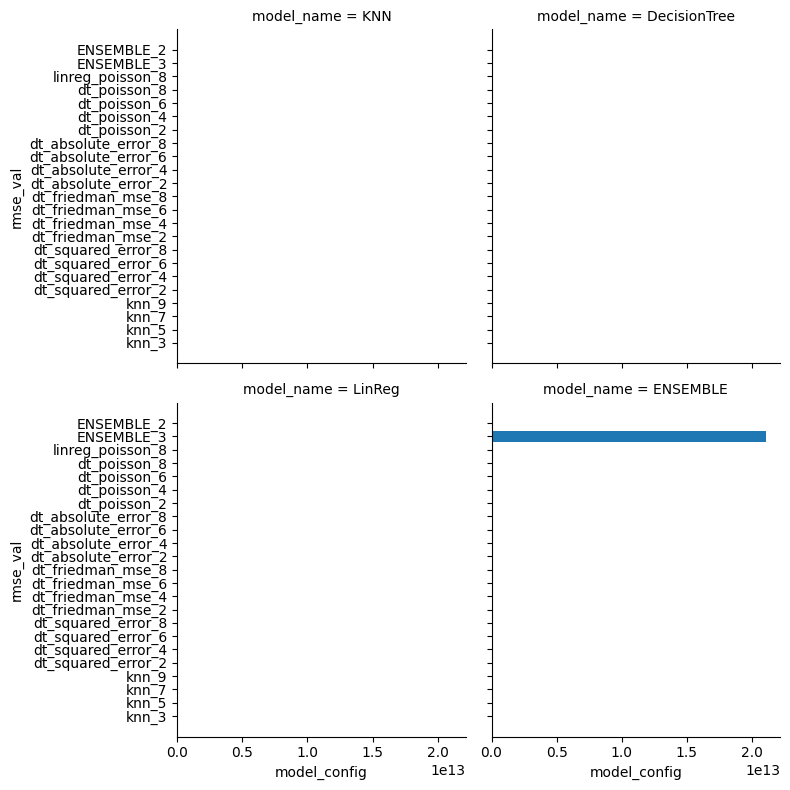

In [54]:
import matplotlib.pyplot as plt

g = sns.FacetGrid(df_results, col="model_name", height=4,col_wrap=2)
g.map(plt.barh, "model_config", "rmse_val")


## top 20 best models


In [55]:
min_rmse = df_results['rmse_val'].min()
best_model = df_results.loc[(df_results['rmse_val'] == min_rmse), 'model'].iloc[0]
print(f'bset model was: {best_model} with params:')
print(best_model.get_params())

bset model was: DecisionTreeRegressor(criterion='absolute_error', min_samples_split=8,
                      random_state=0) with params:
{'ccp_alpha': 0.0, 'criterion': 'absolute_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 8, 'min_weight_fraction_leaf': 0.0, 'random_state': 0, 'splitter': 'best'}


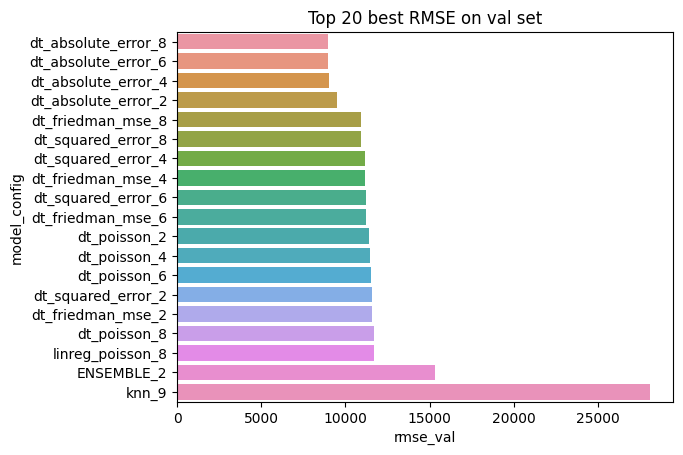

In [56]:
sns.barplot(data= df_results.sort_values(by='rmse_val', ascending=True)[:20] , y='model_config',x='rmse_val',orient = 'h')
plt.title('Top 20 best RMSE on val set');

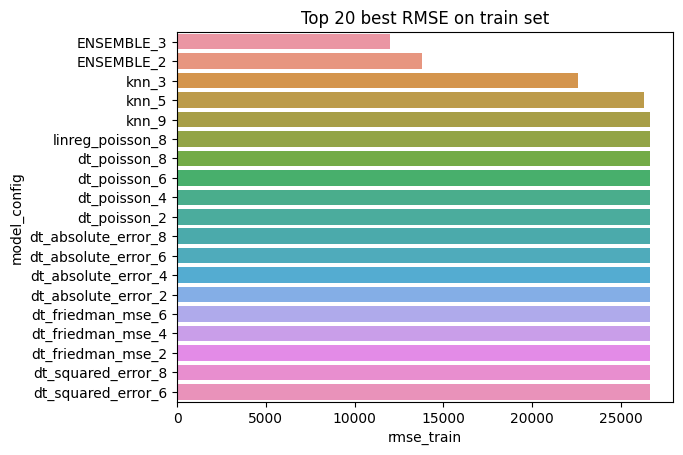

In [57]:
sns.barplot(data= df_results.sort_values(by='rmse_train', ascending=True)[:20] , y='model_config',x='rmse_train',orient = 'h');
plt.title('Top 20 best RMSE on train set');

# Actual vs Prediction plot

on val set

In [58]:
min_rmse = df_results['rmse_val'].min()
best_model = df_results.loc[(df_results['rmse_val'] == min_rmse), 'model'].iloc[0]
val_y_pred = best_model.predict(val_x)
y_val_true = val_y['Salary']

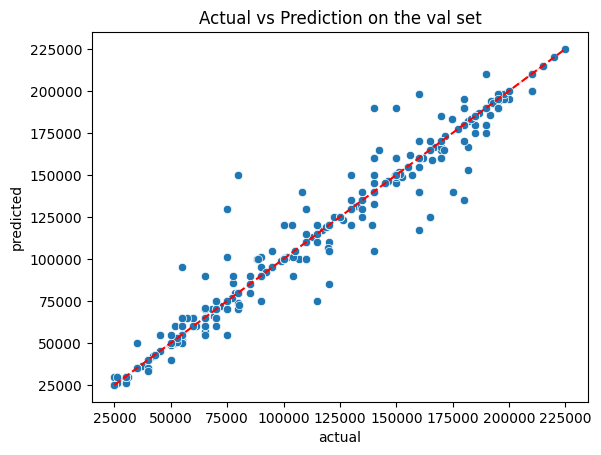

In [59]:
data = {'actual': y_val_true,
        'predicted': val_y_pred}
df = pd.DataFrame(data)
sns.scatterplot(data=df, x='actual', y='predicted')
sns.lineplot(x=y_val_true, y=y_val_true,color='red', linestyle='dashed')
plt.title('Actual vs Prediction on the val set');

on train set

In [60]:
min_rmse = df_results['rmse_val'].min()
best_model = df_results.loc[(df_results['rmse_val'] == min_rmse), 'model'].iloc[0]
train_y_pred = best_model.predict(train_x)
y_train_true = train_y['Salary']

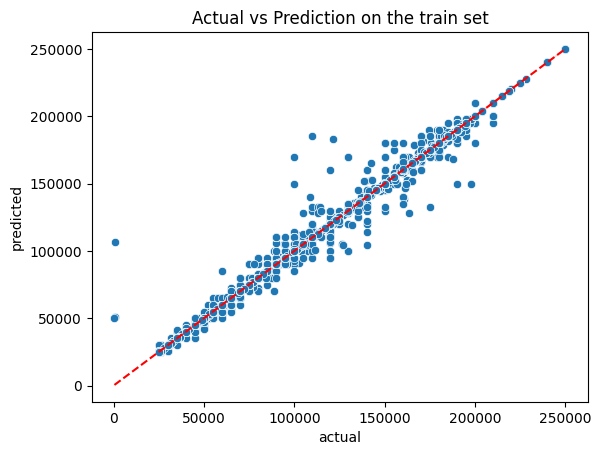

In [61]:
data = {'actual': y_train_true,
        'predicted': train_y_pred}
df = pd.DataFrame(data)
sns.scatterplot(data=df, x='actual', y='predicted')
sns.lineplot(x=y_train_true, y=y_train_true,color='red', linestyle='dashed')
plt.title('Actual vs Prediction on the train set');

# Run on test set
1. take the best model (had lowest rmse value on validation)
2. train it on all train set
3. write test dic

In [62]:
min_rmse = df_results['rmse_val'].min()
best_model = df_results.loc[(df_results['rmse_val'] == min_rmse), 'model'].iloc[0]
best_model

DecisionTreeRegressor(criterion='absolute_error', min_samples_split=8,
                      random_state=0)

train on entire train set

In [63]:
best_model.fit(df_x_train_skills_copy_encode,df_y_train_skills['Salary'])

DecisionTreeRegressor(criterion='absolute_error', min_samples_split=8,
                      random_state=0)

recheck on validation set

In [64]:
val_y_pred = best_model.predict(val_x)
rmse_val = mean_squared_error(val_y, val_y_pred, squared=False)
rmse_val

3506.310296924802

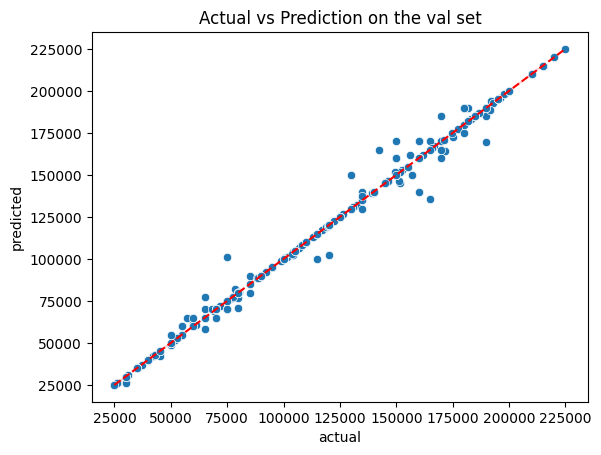

In [65]:
data = {'actual': y_val_true,
        'predicted': val_y_pred}
df = pd.DataFrame(data)
sns.scatterplot(data=df, x='actual', y='predicted')
sns.lineplot(x=y_val_true, y=y_val_true,color='red', linestyle='dashed')
plt.title('Actual vs Prediction on the val set');

## Predict on test

In [66]:
df_x_test_skills_copy_encode.drop('height', axis=1, inplace=True,errors='ignore')

In [67]:
dict_test = {"id":[],'salary':[]}
y_pred = best_model.predict(df_x_test_skills_copy_encode)
dict_test["id"] = list(df_x_test_skills_copy_encode.index)
dict_test["salary"] = y_pred
df_test_result = pd.DataFrame(dict_test).set_index('id')
df_test_result.index = df_test_result.index.astype(str)
df_test_result["salary"] = df_test_result["salary"].astype(int)


In [68]:
df_test_result.head()

,salary
id,
6480,140000
5343,55000
2576,80247
6103,195000
3290,75000


In [69]:
results_test_dict = df_test_result['salary'].to_dict() # CREATE FINAL DICT
results_test_dict

{'6480': 140000,
 '5343': 55000,
 '2576': 80247,
 '6103': 195000,
 '3290': 75000,
 '2797': 182392,
 '6577': 55000,
 '4401': 26000,
 '693': 172500,
 '4700': 100000,
 '666': 110000,
 '694': 160000,
 '6329': 110000,
 '4129': 26000,
 '1083': 130000,
 '1606': 195000,
 '5977': 200000,
 '1231': 185000,
 '4239': 26000,
 '127': 112500,
 '5606': 70000,
 '6386': 170000,
 '5990': 185000,
 '5439': 100000,
 '850': 90000,
 '2891': 101300,
 '5483': 50000,
 '1329': 185000,
 '1763': 90000,
 '3332': 60000,
 '668': 195000,
 '2591': 146508,
 '2485': 126753,
 '2484': 146508,
 '1218': 120000,
 '1125': 195000,
 '5327': 57000,
 '5165': 25000,
 '2425': 174821,
 '4175': 75000,
 '3094': 103223,
 '400': 170000,
 '112': 175000,
 '6056': 90000,
 '1905': 170000,
 '5328': 60000,
 '2379': 76742,
 '3496': 33000,
 '912': 110000,
 '4103': 35000,
 '105': 162000,
 '241': 35000,
 '2042': 100000,
 '1043': 130000,
 '2418': 150000,
 '6110': 185000,
 '533': 150000,
 '1815': 115000,
 '2705': 80000,
 '6624': 40000,
 '5132': 110000

## **Final result** dictionary
{"key" : "value"}

In [70]:
import json
with open("/content/gdrive/MyDrive/Colab Notebooks/Naya DS course/project3_regression/results.json", "w") as fp:
    json.dump(results_test_dict, fp)  # encode dict into JSON
print("Done writing dict into .json file")

Done writing dict into .json file
